<h2 style='color:blue' align="center">Logistic Regression: Multiclass Classification</h2>

In [67]:
pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [68]:
from matplotlib import pyplot as plt

%matplotlib inline

In [69]:
from sklearn.datasets import load_digits    # pre-defined ready made datasets

In [70]:
digits = load_digits()

In [71]:
dir(digits)  # input - data, ouput - target (to train our model)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [72]:
input_data = digits.data[0]  # 8*8 image and image represented as 1 dimensional array
input_data

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

<Figure size 640x480 with 0 Axes>

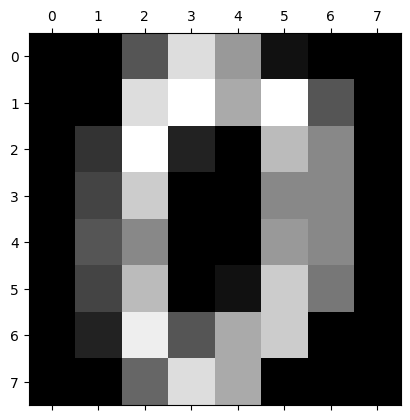

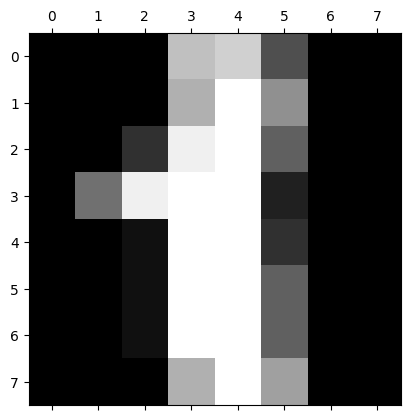

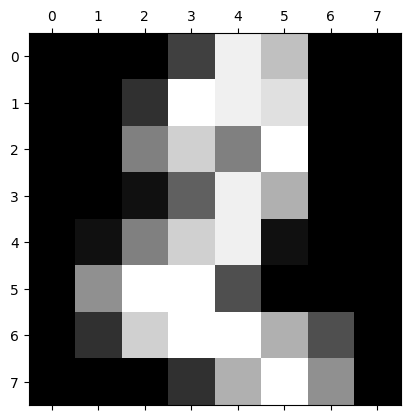

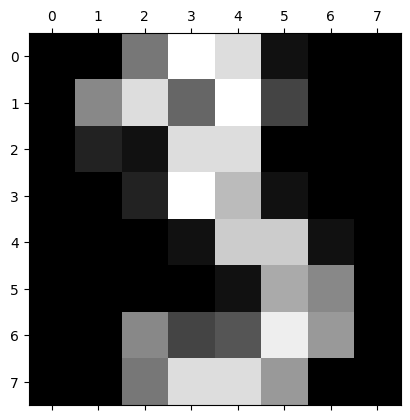

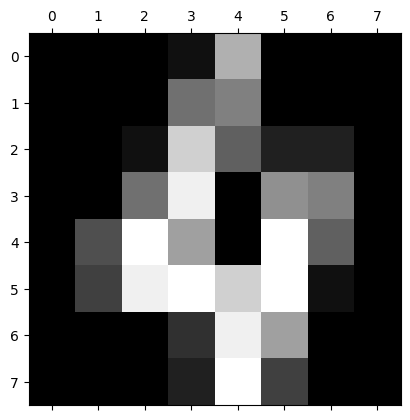

In [73]:
plt.gray()

for i in range(5):
    plt.matshow(digits.images[i])

In [74]:
digits.target[0:5]  # output data

array([0, 1, 2, 3, 4])

In [75]:
digits.target_names[0:5]   # output data names

array([0, 1, 2, 3, 4])

In [76]:
from sklearn.model_selection import train_test_split

In [77]:
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.2)

In [78]:
len(X_train)

1437

In [79]:
len(X_test)

360

<h4 style='color:purple'>Create and train logistic regression model</h4>

In [80]:
from sklearn.linear_model import LogisticRegression


model = LogisticRegression()

In [81]:
model.fit(X_train, y_train)

/home/jose-antony/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [82]:
"""

- using the X_test it will calculate the y_predited value and it will compare those predicted value against the real
  value which is y_test

"""

model.score(X_test, y_test)  

0.9611111111111111

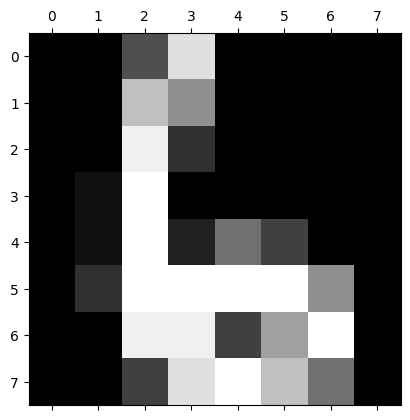

In [83]:
plt.matshow(digits.images[67])

In [84]:
digits.target[67]  # expected value

np.int64(6)

In [85]:
# when we are passing single input, then that should be 2d array

model.predict([digits.data[67]])  # predicted value

array([6])

In [86]:
# when we are passing multiple input, then we don't need to pass 2d array

model.predict(digits.data[0:5])

array([0, 1, 2, 3, 4])

<p><strong>Notes</strong>:</p>
<ul>
    <li>My model score is <strong>0.9555</strong>. My model is pretty good.</li>
    <li>How do I know where it didn't do well?</li>
    <li>Because all the samples I tried seem to be doing pretty well, I want to know where exactly it fails.</li>
    <li>I want to get an overall feeling of model accuracy, and one of the ways of doing that is by using a <strong>confusion matrix</strong>.</li>
</ul>


<h4 style='color:purple'>Confusion Matrix</h4>

In [87]:
# confusion matrix


y_predicted = model.predict(X_test)

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_predicted)  # truth - y_test, predicted - which is our model predicted
cm


array([[39,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 35,  0,  1,  0,  0,  0,  0,  1,  1],
       [ 0,  0, 36,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 37,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 35,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  1,  0, 33,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 44,  0,  1,  0],
       [ 0,  0,  0,  0,  1,  1,  0, 22,  0,  0],
       [ 0,  2,  1,  0,  0,  2,  1,  0, 26,  0],
       [ 0,  0,  0,  1,  0,  0,  0,  0,  0, 39]])

Text(95.72222222222221, 0.5, 'Truth')

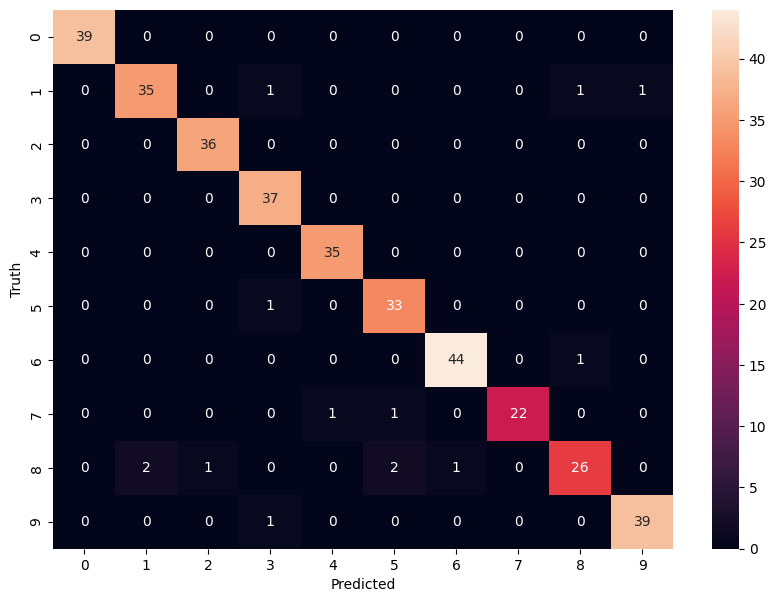

In [88]:
import seaborn as sn  # it's used for visualization like matplotlib
 
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

<p>
  - 47 times the truth was <strong>0</strong> and model predicted it to be <strong>0</strong> (1st row) <br>
  - 3 times the truth was <strong>8</strong> and model predicted it to be <strong>1</strong> (2nd row)
</p>
<p>
  - The confusion matrix is just a nice way of visualizing how well our model is doing.
</p>
